In [ ]:
import pandas as pd
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from ftfy import fix_text
import re 

In [2]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())

2.2.2
CUDA available: False


In [3]:
df = pd.read_excel("amazon_product_reviews.xlsx")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â‚¹399,"â‚¹1,099",0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,â‚¹349,0.43,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,"â‚¹1,899",0.90,3.9,7928,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â‚¹329,â‚¹699,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â‚¹154,â‚¹399,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


<Figure size 1000x1000 with 0 Axes>

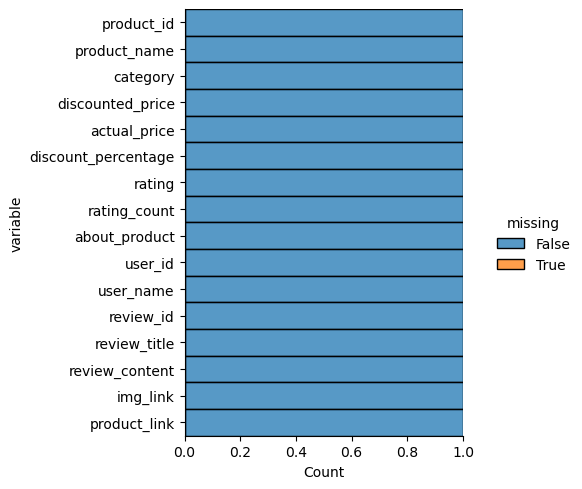

In [4]:
plt.figure(figsize=(10,10))
sns.displot(
       data=df.isna().melt(value_name='missing'),
       y='variable',
       hue='missing',
       multiple='fill'
   )

In [ ]:
# Cleaning Data 
def clean_price(value):
    if pd.isna(value): 
        return None
    
    text = str(value)
    
    text = text.replace("â‚¹", "₹")
    
    numbers = re.findall(r"\d+", text)
    if numbers:
        return int("".join(numbers))  
    return None 

# Apply cleaning
df["actual_price"] = df["actual_price"].apply(clean_price)
df["discounted_price"] = df["discounted_price"].apply(clean_price)

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")


df["about_product"] = df["about_product"].astype(str).apply(fix_text)


In [6]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,0.43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,0.90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:

sentiment_model = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")



df["Feedback_review"] = df["review_content"].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['label'] if x.strip() != "" else None
)

print(df[["review_content", "Feedback_review"]].head(10))

Device set to use cpu


                                      review_content Feedback_review
0  Looks durable Charging is fine tooNo complains...        POSITIVE
1  I ordered this cable to connect my phone to An...        POSITIVE
2  Not quite durable and sturdy,https://m.media-a...        POSITIVE
3  Good product,long wire,Charges good,Nice,I bou...        NEGATIVE
4  Bought this instead of original apple, does th...        POSITIVE
5  It's a good product.,Like,Very good item stron...        POSITIVE
6  Build quality is good and it is comes with 2 y...        POSITIVE
7  Worth for money - suitable for Android auto......        POSITIVE
8  I use this to connect an old PC to internet. I...        NEGATIVE
9  I ordered this cable to connect my phone to An...        POSITIVE


In [8]:
df.to_excel("amazon_product_reviews_updated.xlsx", index=False)

In [9]:
from tqdm import tqdm

# Load the faster model
classifier = pipeline(
    "zero-shot-classification",
    model="cross-encoder/nli-distilroberta-base"
)

# Candidate feature labels
candidate_labels = [
    "Bluetooth", "wireless", "Fast Charging", "High Speed", "WiFi",
    "Waterproof", "Voice Assistant", "Full HD", "Data sync", "Flexible"
]

# Function to extract features
def extract_features(text, threshold=0.5):
    if pd.isna(text) or text.strip() == "":
        return []
    result = classifier(text, candidate_labels, multi_label=True)
    features = [label for label, score in zip(result["labels"], result["scores"]) if score > threshold]
    return features

# Add tqdm progress bar
tqdm.pandas()

# Apply function with progress bar
df["features"] = df["about_product"].astype(str).progress_apply(extract_features)

print(df[["about_product", "features"]].head(10))

config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

c:\Users\halkhthran.t\AppData\Local\anaconda3\envs\Chatbot\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\halkhthran.t\.cache\huggingface\hub\models--cross-encoder--nli-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu
100%|██████████| 1465/1465 [52:16<00:00,  2.14s/it] 

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   
5  Fast Charging & Data Sync: Solero TB301 Type-C...   
6  It Ensures High Speed Transmission And Chargin...   
7  1m long Type-C USB Cable|Sturdy and Durable. W...   
8  USB WiFi Adapter —— Speedy wireless transmissi...   
9  Universal Compatibility – It is compatible wit...   

                                           features  
0  [High Speed, Data sync, Flexible, Fast Charging]  
1                         [Fast Charging, Flexible]  
2                                                []  
3               [Flexible, Fast Charging, wireless]  
4    [Data sync, wireless, Flexible, Fast Charging]  
5                        [Fast Charging, Data sync]  
6  [F

In [10]:
df.to_excel("amazon_product_reviews_updated1.xlsx", index=False)

In [ ]:
sns.countplot(x="Feedback_review", data=df, palette="coolwarm")
plt.title("Sentiment Distribution of Reviews")
plt.show()

In [ ]:

sentiment_counts = df.groupby(["product_name", "Feedback_review"]).size().unstack(fill_value=0)
top_products = sentiment_counts.sum(axis=1).sort_values(ascending=False).head(5)

sentiment_counts.loc[top_products.index].plot(
    kind="bar", stacked=True, figsize=(10,5), colormap="coolwarm"
)

plt.title("Sentiment Breakdown for Top 5 Products")
plt.ylabel("Number of Reviews")
plt.show()
